### Data Link: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

### **Import needed modules**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(42)

### **EDA**

Read Data

In [2]:
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')

# Check the first few rows of the dataset
print(df.head())

     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

Get Information 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


Statistical Describtion

In [4]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### **Data Preprocessing**

Drop unneeded columns

In [5]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

Define X and y

In [6]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

Data Scaling

In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

Data Splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400, 1)
(100, 4)
(100, 1)


### **Linear Regression**
LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
- Doc Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

### **Ridge Regression**
sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, 
                           solver='auto', positive=False, random_state=None)
- Doc Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [10]:
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

### **Lasso Regression**
sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, 
                        tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
- Doc Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [11]:
lasso_model = Lasso(alpha=0.001)  # You can experiment with different alpha values
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

### **Evaluations**

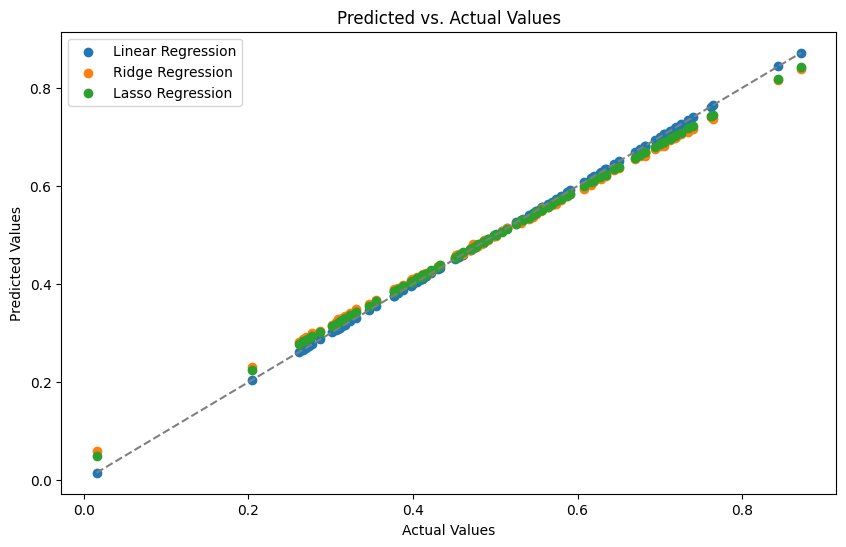

In [12]:
# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, label='Linear Regression')
plt.scatter(y_test, ridge_pred, label='Ridge Regression')
plt.scatter(y_test, lasso_pred, label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [13]:
print(f'MSE\nLinear Regression: {lr_mse}\nRidge Regression: {ridge_mse}\nLasso Regression: {lasso_mse}')

MSE
Linear Regression: 4.942037654687503e-10
Ridge Regression: 0.00020612753235242323
Lasso Regression: 0.00012444710615707778


In [14]:
print(f'R-2\nLinear Regression: {lr_r2}\nRidge Regression: {ridge_r2}\nLasso Regression: {lasso_r2}')

R-2
Linear Regression: 0.9999999793157544
Ridge Regression: 0.9913728044613258
Lasso Regression: 0.9947914307866276
